Loading data...
17464789/17464789 [==============================] - 196s 11us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)

Building and training SimpleRNN model...
Epoch 1/10
782/782 - 104s - loss: 0.6532 - accuracy: 0.5937 - val_loss: 0.9416 - val_accuracy: 0.5820 - 104s/epoch - 133ms/step
Epoch 2/10
782/782 - 99s - loss: 0.5148 - accuracy: 0.7521 - val_loss: 0.5780 - val_accuracy: 0.6898 - 99s/epoch - 126ms/step
Epoch 3/10
782/782 - 104s - loss: 0.4082 - accuracy: 0.8203 - val_loss: 0.4858 - val_accuracy: 0.7826 - 104s/epoch - 133ms/step
Epoch 4/10
782/782 - 99s - loss: 0.4011 - accuracy: 0.8161 - val_loss: 0.5266 - val_accuracy: 0.7640 - 99s/epoch - 127ms/step
Epoch 5/10
782/782 - 97s - loss: 0.3550 - accuracy: 0.8512 - val_loss: 0.5313 - val_accuracy: 0.7659 - 97s/epoch - 124ms/step
Epoch 6/10
782/782 - 101s - loss: 0.2942 - accuracy: 0.8836 - val_loss: 0.5808 - val_accuracy: 0.7481 - 101s/epoc

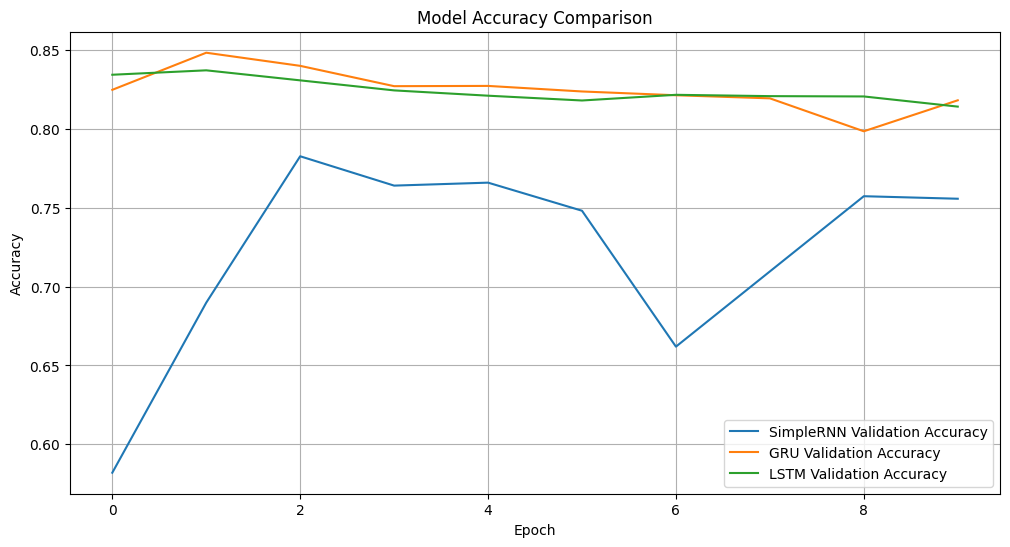

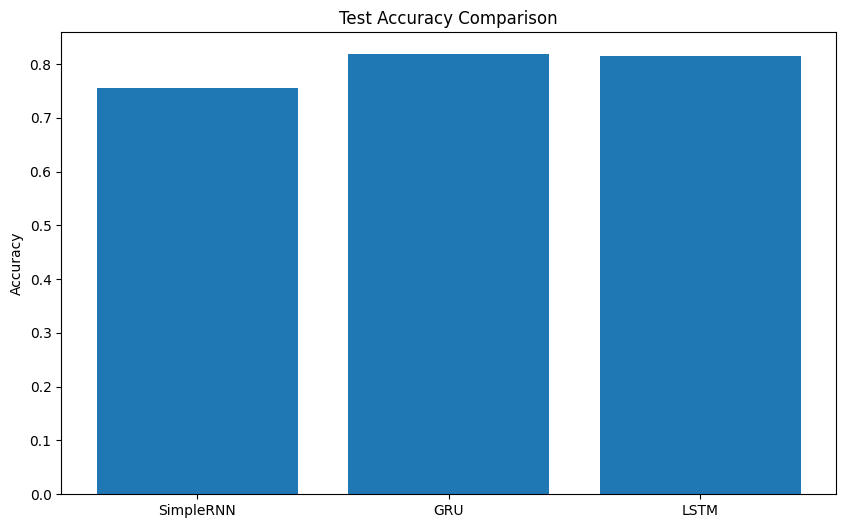

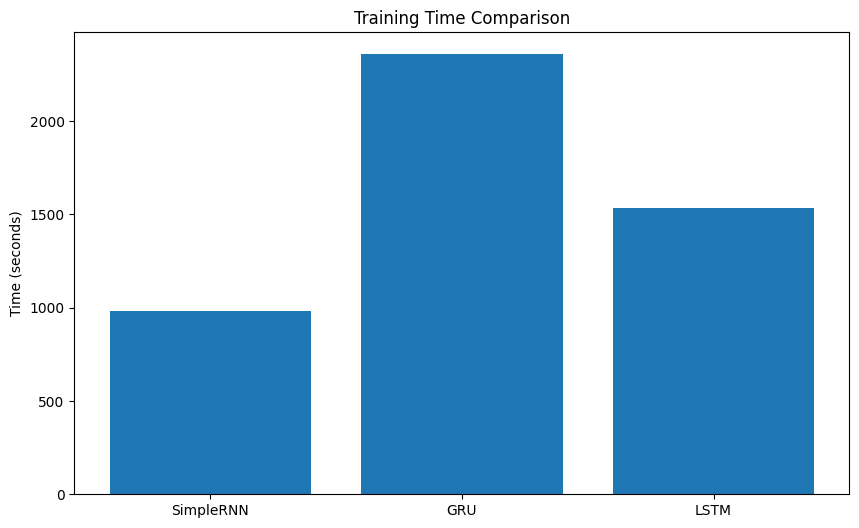

In [1]:
# Problem 1: Execution of various methods
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM
from keras.datasets import imdb
from keras import backend as K
import time

# Parameters
max_features = 20000  # vocabulary size
maxlen = 80           # sequence length
batch_size = 32
epochs = 10           

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Function to create and train models
def create_and_train_model(rnn_layer, name):
    print(f'\nBuilding and training {name} model...')
    model = Sequential()
    model.add(Embedding(max_features, 128))
    
    # Add the specific RNN layer
    if name == 'SimpleRNN':
        model.add(rnn_layer(128))
    else:
        model.add(rnn_layer(128, dropout=0.2, recurrent_dropout=0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=2)
    training_time = time.time() - start_time
    
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print(f'{name} test score:', score)
    print(f'{name} test accuracy:', acc)
    print(f'{name} training time: {training_time:.2f} seconds')
    
    return history, acc, training_time

# Create and train the three models
models = [
    (SimpleRNN, 'SimpleRNN'),
    (GRU, 'GRU'),
    (LSTM, 'LSTM')
]

results = []
histories = []

for layer, name in models:
    history, accuracy, train_time = create_and_train_model(layer, name)
    results.append((name, accuracy, train_time))
    histories.append((name, history))

# Print comparison results
print("\nModel Comparison:")
print("=" * 50)
print(f"{'Model':<10} {'Accuracy':<10} {'Training Time (s)':<20}")
print("-" * 50)
for name, acc, time in results:
    print(f"{name:<10} {acc:<10.4f} {time:<20.2f}")

# Plot accuracy comparison
plt.figure(figsize=(12, 6))

for name, history in histories:
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('rnn_accuracy_comparison.png')
plt.show()

# Plot training time comparison
names = [result[0] for result in results]
accuracies = [result[1] for result in results]
times = [result[2] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.savefig('rnn_accuracy_bar.png')

plt.figure(figsize=(10, 6))
plt.bar(names, times)
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.savefig('rnn_time_bar.png')

Loading IMDB data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)

Building and training SimpleRNN model on IMDB...
Epoch 1/5
782/782 - 28s - loss: 0.6306 - accuracy: 0.6180 - val_loss: 0.5444 - val_accuracy: 0.7233 - 28s/epoch - 36ms/step
Epoch 2/5
782/782 - 29s - loss: 0.4684 - accuracy: 0.7808 - val_loss: 0.5310 - val_accuracy: 0.7377 - 29s/epoch - 37ms/step
Epoch 3/5
782/782 - 27s - loss: 0.4456 - accuracy: 0.7945 - val_loss: 0.5052 - val_accuracy: 0.7590 - 27s/epoch - 35ms/step
Epoch 4/5
782/782 - 27s - loss: 0.3526 - accuracy: 0.8522 - val_loss: 0.4891 - val_accuracy: 0.8087 - 27s/epoch - 35ms/step
Epoch 5/5
782/782 - 27s - loss: 0.3075 - accuracy: 0.8762 - val_loss: 0.4939 - val_accuracy: 0.7921 - 27s/epoch - 35ms/step
782/782 [==============================] - 6s 7ms/step - loss: 0.4939 - accuracy: 0.7921
SimpleRNN on IMDB test score: 0.49387019872665405
SimpleRNN on IMDB test accuracy: 0.79207998

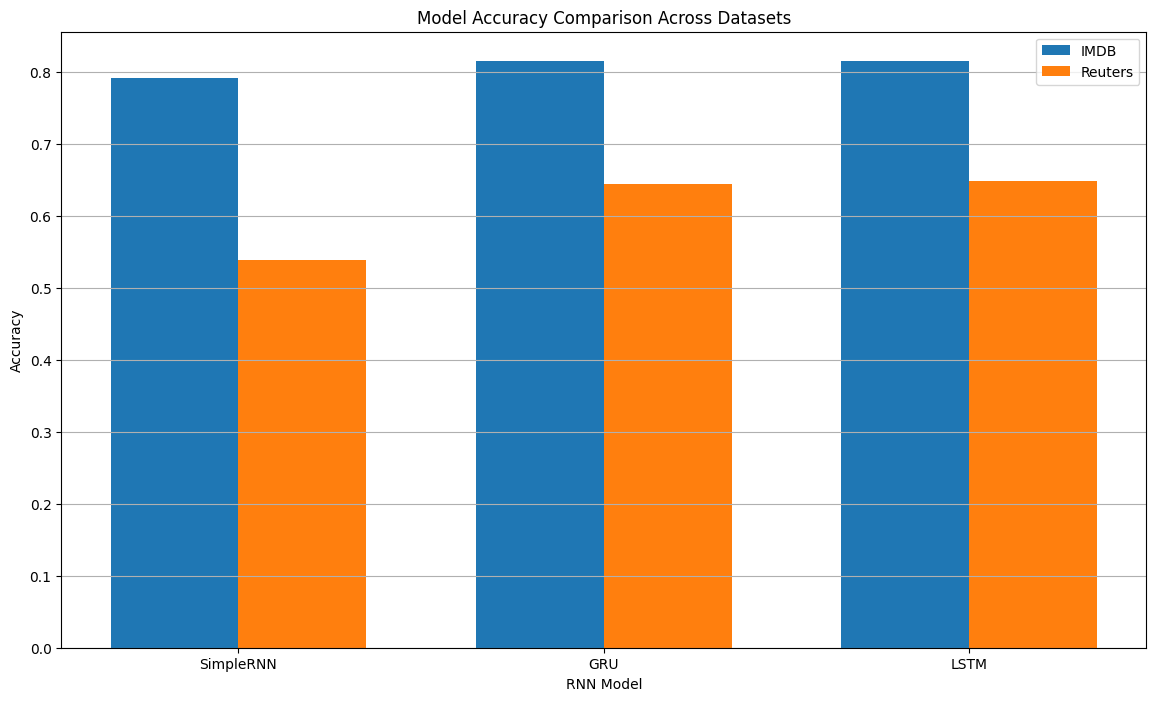

In [3]:
# Problem 2: Comparison between multiple data sets
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM
from keras.datasets import imdb, reuters
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import time

# Parameters
max_features = 10000  
maxlen = 80
batch_size = 32
epochs = 5  

def load_and_prepare_data(dataset_name):
    print(f'Loading {dataset_name} data...')
    
    if dataset_name == 'IMDB':
        (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
        num_classes = 1
        loss_function = 'binary_crossentropy'
        output_activation = 'sigmoid'
        
    elif dataset_name == 'Reuters':
        (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
        num_classes = np.max(y_train) + 1
        # Convert class vectors to binary class matrices (one-hot encoding)
        # y_train = np_utils.to_categorical(y_train, num_classes)
        # y_test = np_utils.to_categorical(y_test, num_classes)
        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)

        loss_function = 'categorical_crossentropy'
        output_activation = 'softmax'
    
    print(len(x_train), 'train sequences')
    print(len(x_test), 'test sequences')
    
    print('Pad sequences (samples x time)')
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    
    return (x_train, y_train), (x_test, y_test), num_classes, loss_function, output_activation

def create_and_train_model(rnn_layer, dataset_name, x_train, y_train, x_test, y_test, num_classes, loss_function, output_activation):
    print(f'\nBuilding and training {rnn_layer.__name__} model on {dataset_name}...')
    model = Sequential()
    model.add(Embedding(max_features, 128))
    
    # Add the specific RNN layer
    if rnn_layer.__name__ == 'SimpleRNN':
        model.add(rnn_layer(128))
    else:
        model.add(rnn_layer(128, dropout=0.2, recurrent_dropout=0.2))
    
    model.add(Dense(num_classes, activation=output_activation))
    
    model.compile(loss=loss_function,
                optimizer='adam',
                metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=2)
    training_time = time.time() - start_time
    
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print(f'{rnn_layer.__name__} on {dataset_name} test score:', score)
    print(f'{rnn_layer.__name__} on {dataset_name} test accuracy:', acc)
    print(f'{rnn_layer.__name__} on {dataset_name} training time: {training_time:.2f} seconds')
    
    return history, acc, training_time

# List of datasets and RNN layers to compare
datasets = ['IMDB', 'Reuters']
rnn_layers = [SimpleRNN, GRU, LSTM]

# Store results
all_results = []

# Process each dataset
for dataset_name in datasets:
    (x_train, y_train), (x_test, y_test), num_classes, loss_function, output_activation = load_and_prepare_data(dataset_name)
    
    for layer in rnn_layers:
        history, accuracy, train_time = create_and_train_model(
            layer, dataset_name, x_train, y_train, x_test, y_test, 
            num_classes, loss_function, output_activation
        )
        all_results.append((dataset_name, layer.__name__, accuracy, train_time))

# Print comparison results
print("\nModel Comparison Across Datasets:")
print("=" * 70)
print(f"{'Dataset':<10} {'Model':<10} {'Accuracy':<10} {'Training Time (s)':<20}")
print("-" * 70)
for dataset, model, acc, time in all_results:
    print(f"{dataset:<10} {model:<10} {acc:<10.4f} {time:<20.2f}")

# Plot comparison
plt.figure(figsize=(14, 8))

for dataset in datasets:
    dataset_results = [r for r in all_results if r[0] == dataset]
    models = [r[1] for r in dataset_results]
    accuracies = [r[2] for r in dataset_results]
    
    x = np.arange(len(models))
    width = 0.35
    
    if dataset == 'IMDB':
        plt.bar(x - width/2, accuracies, width, label=f'{dataset}')
    else:
        plt.bar(x + width/2, accuracies, width, label=f'{dataset}')

plt.xlabel('RNN Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Across Datasets')
plt.xticks(x, models)
plt.legend()
plt.grid(True, axis='y')
plt.savefig('multi_dataset_comparison.png')
plt.show()

# Explanation of RNN-related Classes in Keras

## RNN
`RNN` is the base class for all recurrent layers in Keras. It's an abstract class that you don't instantiate directly. Instead, you use its concrete implementations: `SimpleRNN`, `GRU`, and `LSTM`. The `RNN` class handles the common functionality for all recurrent layers, such as:
- Processing sequence data
- Managing the state of the RNN
- Implementing the backpropagation through time algorithm
- Supporting optional masking for variable-length sequences
- Providing the architecture for both stateful and stateless RNN operations

## SimpleRNNCell, GRUCell, LSTMCell
These are cell-level implementations that correspond to each RNN type:

### SimpleRNNCell
This is the cell implementation of the most basic RNN architecture. It computes:
```
output = activation(input · input_kernel + prev_output · recurrent_kernel + bias)
```
Where:
- `activation` is typically tanh
- `input` is the current input vector
- `prev_output` is the output from the previous time step
- `input_kernel` and `recurrent_kernel` are weight matrices
- `bias` is a bias vector

The SimpleRNNCell suffers from the vanishing/exploding gradient problem, making it difficult to capture long-term dependencies.

### GRUCell
This is the cell implementation of the Gated Recurrent Unit (GRU), which uses two gates (reset and update) to solve the vanishing gradient problem:
- The reset gate determines how to combine new input with previous memory
- The update gate defines how much of the previous memory to keep

GRU's formula is more complex than SimpleRNN but allows for better gradient flow through the network, enabling the learning of longer-term dependencies.

### LSTMCell
This is the cell implementation of the Long Short-Term Memory (LSTM) architecture. It uses three gates (input, forget, and output) and a cell state to regulate information flow:
- Input gate: controls what new information to store in the cell state
- Forget gate: controls what information to discard from the cell state
- Output gate: controls what information from the cell state to output
- Cell state: acts as a memory highway that information can flow through relatively unchanged

The LSTM architecture allows for even better learning of long-term dependencies compared to GRU, but at the cost of additional computational complexity.

## StackedRNNCells
This class allows you to stack multiple RNN cells. It creates a layer that consists of multiple RNN cells stacked vertically (in depth). When you feed input to a StackedRNNCells layer, the input first goes through the first cell, then the output of the first cell becomes the input to the second cell, and so on.

This enables the creation of deep RNN architectures with multiple layers of recurrent processing, which can learn hierarchical representations of the input data.

## CuDNNGRU and CuDNNLSTM
These are GPU-accelerated implementations of GRU and LSTM layers using NVIDIA's cuDNN library:

### CuDNNGRU
A fast GRU implementation backed by cuDNN. It can only be run on a GPU, and only supports the tanh activation function. It's much faster than the regular GRU implementation when training on GPU but lacks features like recurrent dropout, masking, and time-step-specific output.

### CuDNNLSTM
A fast LSTM implementation backed by cuDNN. Like CuDNNGRU, it can only be run on a GPU and only supports the tanh activation function. It's significantly faster than the regular LSTM implementation on GPU but has the same limitations as CuDNNGRU.

Note: In newer versions of Keras/TensorFlow, these cuDNN implementations are automatically used when possible (when running on GPU and using compatible settings), so explicit use of these classes is becoming less common.

## When to Use Each Class

1. **SimpleRNN/GRU/LSTM**: Use these when you need the full layer functionality with support for features like masking, return sequences, and return states.

2. **SimpleRNNCell/GRUCell/LSTMCell**: Use these when you need fine-grained control over the RNN architecture, such as when building custom RNN layers or when implementing attention mechanisms.

3. **StackedRNNCells**: Use when you want to create a deep RNN with multiple layers of recurrent processing.

4. **CuDNNGRU/CuDNNLSTM**: Use these when maximum speed is required and you're running on a GPU. However, in modern Keras/TensorFlow versions, this optimization is often handled automatically.